In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
register_matplotlib_converters()

# Generate some time series data :

## $ y_t = \mu + 0.4 \epsilon_{t-1} + 0.3 \epsilon_{t-2} + \epsilon_t $
## $ \epsilon_t \sim \mathcal{N}(0,1) $



In [8]:
# generating 400 such series
errors = np.random.normal(0,1,400)

In [9]:
date_index = pd.date_range(start = '9/1/2019', end = '1/1/2020')

In [10]:
# Generating the series according to above MA series 

mu = 50
series = []

for t in range(1, len(date_index)+1):
    series.append(mu + 0.4 * errors[t-1] + 0.3 * errors[t-2] + errors[t])


In [ ]:
# converting into a data frame

In [11]:
series = pd.Series(series, date_index)
series = series.asfreq(pd.infer_freq(series.index))

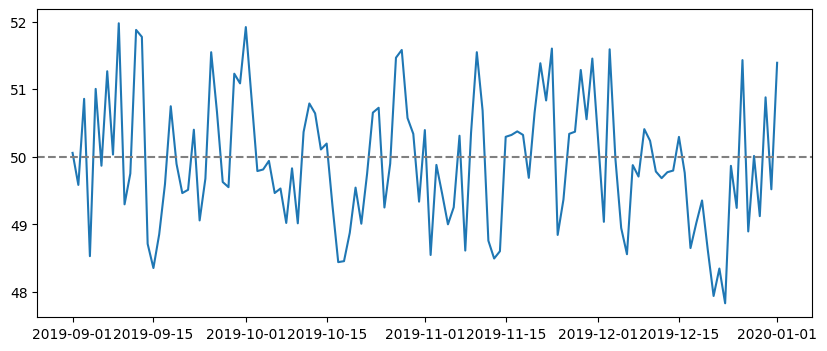

In [12]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.axhline(mu, linestyle='--', color='grey')

# ACF

<BarContainer object of 10 artists>

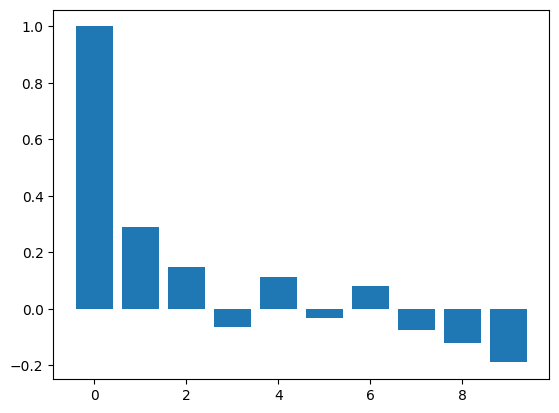

In [13]:
"""
Here we are using acf instead of plot_acf  , basically we need to analyse what order of MA model will fit.
Remember from the lecture that ACF dies out from q(order of the model) and it will have non zero values if k<=q so
after q the acf will be zero so here since we have fitted an MA(2) model so after lag 2 i.e q=2 acf should die
"""

acf_vals = acf(series)
num_lags = 10
plt.bar(range(num_lags), acf_vals[:num_lags])

Here we can see it dies from lag 3

# PACF

<BarContainer object of 21 artists>

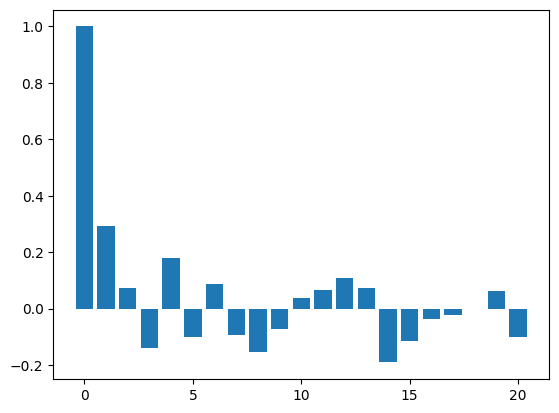

In [14]:
pacf_vals = pacf(series)
num_lags = 21
plt.bar(range(num_lags), pacf_vals[:num_lags])

Here we can see that it's diminishing hence an MA model

# Training and Test Data

In [15]:
train_end = datetime(2019,12,30)
test_end = datetime(2020,1,1)

train_data = series[:train_end]
test_data = series[train_end + timedelta(days=1):test_end]

# Fit ARIMA Model

For a MA model it's very important to note if we are fitting 

In [16]:
# create a model
model = ARIMA(train_data, order=(0,0,2))

In [17]:
# fit the model
model_fit = model.fit()

In [18]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  121
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -159.124
Date:                Wed, 26 Jul 2023   AIC                            326.247
Time:                        08:04:01   BIC                            337.430
Sample:                    09-01-2019   HQIC                           330.789
                         - 12-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.9267      0.125    398.627      0.000      49.681      50.172
ma.L1          0.3302      0.092      3.571      0.000       0.149       0.511
ma.L2          0.1782      0.080      2.227      0.0

We can see here the constant predicted is pretty close to $\mu$.\
Here lag1 term is predicted to be 0.56(very far away from actual) and lag2(pretty close but p>0.05) term as 0.24.

# Predicted Model

## $ \hat{y_{t}} = 50 +  0.3 * \epsilon_{t-1} + 0.18 \epsilon_{t-2} + \epsilon_t$

In [19]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [20]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)

In [21]:
residuals = test_data - predictions

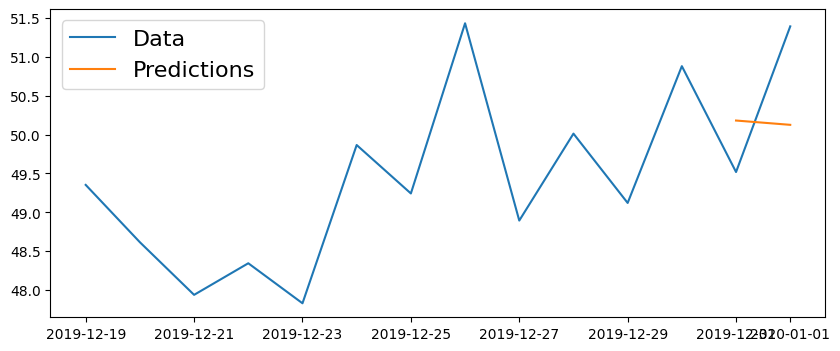

In [22]:
plt.figure(figsize=(10,4))

plt.plot(series[-14:])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)